In [38]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import os
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv("CleanedData_AllPasses_discretized.csv")

relevant_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success', 'HullArea_cluster_centroid', 'PassDist_cluster_centroid', 'ShotClock_cluster_centroid']
categorical_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success']

for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print("encoded", col)

df = df[relevant_columns]
df.head()

encoded passInHull
encoded receiverinHull
encoded receiverIsOpen
encoded isAlleyOOp
encoded Success


,passInHull,receiverinHull,receiverIsOpen,isAlleyOOp,Success,HullArea_cluster_centroid,PassDist_cluster_centroid,ShotClock_cluster_centroid
0,0,1,0,0,0,123.656098,17.300095,22.531952
1,0,0,1,0,0,123.656098,52.068535,22.531952
2,1,0,0,0,0,123.656098,17.300095,22.531952
3,0,1,0,0,0,123.656098,52.068535,2.665992
4,0,1,0,0,0,62.305419,17.300095,22.531952


In [39]:
X = pd.DataFrame()
y = df[["Success"]]

# Custom OneHot

for col in ["HullArea_cluster_centroid", "PassDist_cluster_centroid", "ShotClock_cluster_centroid"]:
    uniq_vals = set(df[col])
    for v in uniq_vals:
        col_name = col + "_" + str(v)
        print(col_name)
        X[col_name] = [1 if x == v else 0 for x in df[col]]

for col in ["passInHull", "receiverinHull", "receiverIsOpen", "isAlleyOOp"]:
    X[col] = df[col]

X.head()

HullArea_cluster_centroid_123.65609799710221
HullArea_cluster_centroid_62.305418840996026
PassDist_cluster_centroid_17.300094924049052
PassDist_cluster_centroid_52.06853546294259
ShotClock_cluster_centroid_9.880969836331666
ShotClock_cluster_centroid_2.6659924146648315
ShotClock_cluster_centroid_22.5319524443989
ShotClock_cluster_centroid_15.62010602742884


,HullArea_cluster_centroid_123.65609799710221,HullArea_cluster_centroid_62.305418840996026,PassDist_cluster_centroid_17.300094924049052,PassDist_cluster_centroid_52.06853546294259,ShotClock_cluster_centroid_9.880969836331666,ShotClock_cluster_centroid_2.6659924146648315,ShotClock_cluster_centroid_22.5319524443989,ShotClock_cluster_centroid_15.62010602742884,passInHull,receiverinHull,receiverIsOpen,isAlleyOOp
0,1,0,1,0,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,1,0,1,0,0,0
3,1,0,0,1,0,1,0,0,0,1,0,0
4,0,1,1,0,0,0,1,0,0,1,0,0


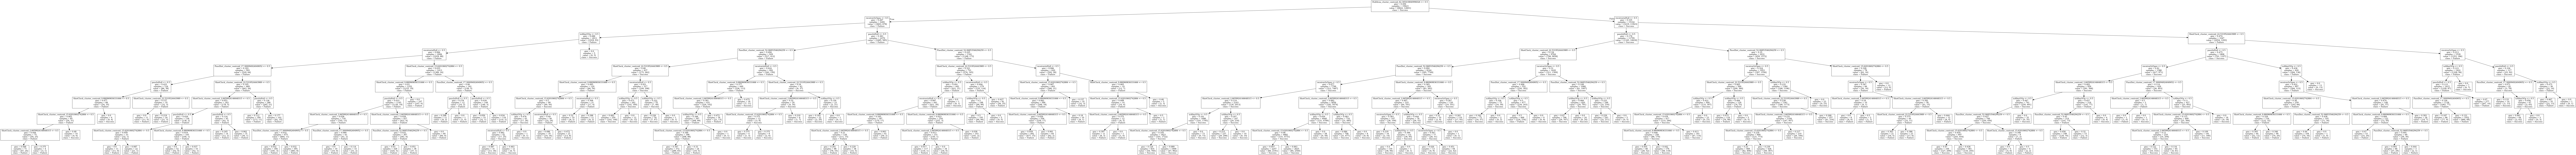

In [41]:
'''
X = df.drop(["Success"], axis=1)
y = df[["Success"]]

enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(X)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

clf = tree.DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_train, y_train)

tree.export_graphviz(clf, out_file='tree.dot', class_names=["Failure", "Success"], feature_names=X.columns.values)
os.system("dot -Tpng tree.dot -o tree.png")

Image(filename='tree.png')

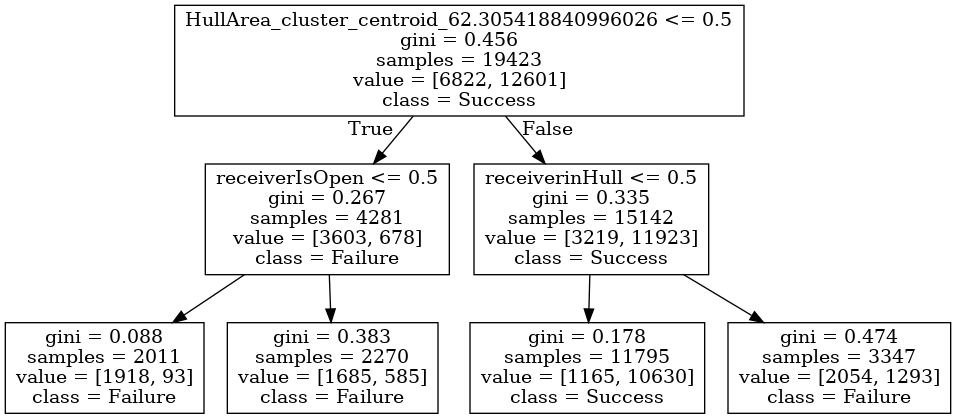

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

small_clf = tree.DecisionTreeClassifier(random_state=7, max_depth = 2)
small_clf = small_clf.fit(X_train, y_train)

tree.export_graphviz(small_clf, out_file='small_tree.dot', class_names=["Failure", "Success"], feature_names=X.columns.values)
os.system("dot -Tpng small_tree.dot -o small_tree.png")

Image(filename='small_tree.png')

In [42]:
print(clf.score(X_test, y_test))

confusion_matrix(y_test, clf.predict(X_test))

0.894648829431


array([[2788,  585],
       [ 423, 5772]])

In [49]:
print(small_clf.score(X_test, y_test))

confusion_matrix(y_test, small_clf.predict(X_test))

0.838837792642


array([[2765,  608],
       [ 934, 5261]])

In [50]:
# Untuned SVM, for comparison
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train.values.ravel())
print(svm_clf.score(X_test, y_test))
confusion_matrix(y_test, svm_clf.predict(X_test))

0.885242474916


array([[2698,  675],
       [ 423, 5772]])

In [51]:
params = {'criterion':('gini', 'entropy'), 
          'max_depth':[6, 12], 
          'max_features': [5,12],
          'min_samples_leaf': [1,10], 
          'min_samples_split': [2, 5]}

# different score function?
gs = GridSearchCV(tree.DecisionTreeClassifier(), params)
gs_res = gs.fit(X_train, y_train)
gs_res.best_estimator_.score(X_test, y_test)

0.89475334448160537

In [52]:
cross_val_score(small_clf, X_test, y_test, cv=10).mean()

0.83883693695294714